# Prices Simulation from Welzia xlsx

We will see a simple example of how to simulated stock prices from an Excel file provide by Welzia.

## 1. Load the historical data

The historical prices are stored in the ``df`` variable as a ``pd.DataFrame``.

In [1]:
from portfolioqtopt.reader import read_welzia_stocks_file

file_path = "/home/ggelabert/Projects/PortfolioQtOpt/data/Histórico carteras Welzia Completo.xlsm"
sheet_name = "BBG (valores)"

df = read_welzia_stocks_file(file_path, sheet_name)

Visualize the ``df`` contents.

In [2]:
display(df.head(3))

,LU0151325312,LU0329760937,LU0115773425,LU0334663233,LU0040507039,LU0231479717,FR0010149120,IE0031724234,FR0010738120,LU0368556220,...,LU0034353002,LU0352097942,IE00B520F527,LU0172125329,LU0415391514,FR0010674978,FR0010609115,IE0032876397,BE0948484184,LU0248173931
Name,Candriam Bonds - Credit Opport,DWS Invest Global Infrastructu,Fidelity Funds - Global Techno,Schroder ISF US Small & Mid-Ca,Vontobel Fund - Emerging Marke,abrdn SICAV I - Emerging Marke,Carmignac Securite,Seilern International Funds PL,Sycomore Asset Management Syco,Vontobel Fund - Emerging Marke,...,DWS Floating Rate Notes,Schroder ISF Global Convertibl,Salar Fund PLC,Vector Fund - Navigator,Bellevue Funds Lux - Bellevue,LFP - La Francaise Sub Debt,LFP - La Francaise Tresorerie,PIMCO Global Investors Series,DPAM B - Equities Euroland,Schroder ISF QEP Global Active
TICKER_AND_EXCH_CODE,DEXHISI LX Equity,DWSGIFC LX Equity,FIDFTEE LX Equity,SCUSIHA LX Equity,VONEMBI LX Equity,ABEFRIA LX Equity,CARSECC FP Equity,STWDGRE ID Equity,SYCPARP FP Equity,VONEMHI LX Equity,...,RENDGAR LX Equity,SCHGOCH LX Equity,SALRFE1 ID Equity,VECNAVI LX Equity,BFLBBIE LX Equity,LFPLIBR FP Equity,CMNTREI FP Equity,PIMGIIA ID Equity,PAMEULF BB Equity,SCHGVCE LX Equity
Date,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,...,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2010-01-01,140.11,81.28,5.794,87.3,476.54,51.69,1492.40002,78.55,1010.59,82.34,...,80.37,98.24,104.56,757.82,138.04,1366.57,104558.81,12.35,93.32,89.17
2010-01-02,140.11,81.28,5.794,87.3,476.54,51.69,1492.40002,78.55,1010.59,82.34,...,80.37,98.24,104.56,757.82,138.04,1366.57,104558.81,12.35,93.32,89.17
2010-01-03,140.11,81.28,5.794,87.3,476.54,51.69,1492.40002,78.55,1010.59,82.34,...,80.37,98.24,104.56,757.82,138.04,1366.57,104558.81,12.35,93.32,89.17


## 2. Make a prevision of the anual expected return

We define expected annual returns as a dictionary that we called ``era`` and a number of simulated prices ``spn`` to be predicted for each stock.

In [29]:
import numpy as np
import pandas as pd

np.random.seed(42)

simulated_expected_returns = np.random.random(df.shape[1]) * 0.1
column_names = (c[0][2] for c in zip(df.columns))
ear = dict(zip(column_names, simulated_expected_returns))
spn = 254

pd.DataFrame.from_dict(ear, orient="index", columns=["expected return"]).T

,DEXHISI LX Equity,DWSGIFC LX Equity,FIDFTEE LX Equity,SCUSIHA LX Equity,VONEMBI LX Equity,ABEFRIA LX Equity,CARSECC FP Equity,STWDGRE ID Equity,SYCPARP FP Equity,VONEMHI LX Equity,...,RENDGAR LX Equity,SCHGOCH LX Equity,SALRFE1 ID Equity,VECNAVI LX Equity,BFLBBIE LX Equity,LFPLIBR FP Equity,CMNTREI FP Equity,PIMGIIA ID Equity,PAMEULF BB Equity,SCHGVCE LX Equity
expected return,0.037454,0.095071,0.073199,0.059866,0.015602,0.015599,0.005808,0.086618,0.060112,0.070807,...,0.083244,0.021234,0.018182,0.01834,0.030424,0.052476,0.043195,0.029123,0.061185,0.013949


## Simulate future prices

1. Check that ``df_prices`` contains prices using the ``Stocks`` object.


In [30]:
from portfolioqtopt.simulation.stocks import Stocks
from portfolioqtopt.simulation.simulation import Simulation

stocks_history = Stocks(df=df)

2. Create the ``simulation`` instance of the ``Simulation`` class.

In [31]:
simulation = Simulation(stocks_history, er=ear, m=spn)

3. Make the simulation with the given historical stock prices, the anual expected returns and the numbers of days. The results is a ``tuple`` containing future returns, covariance and prices respectively names ``future_returns``, ``future_cov``, ``future_prices``.

In [32]:
future_returns, future_cov, future_prices = simulation(order=12)

2023-01-18 15:44:26.199 | WARNING  | portfolioqtopt.simulation.simulation:correlate:74 - Correlated daily returns not all inf to 1!
2023-01-18 15:44:30.487 | INFO     | portfolioqtopt.simulation.simulation:get_returns_adjustment:133 - dl=Polynomial([-4.19445136e-02,  2.54005394e+02, -1.27005613e+02,  8.46724992e+01,
       -6.35060517e+01,  5.08062708e+01, -4.23398232e+01,  3.62924233e+01,
       -3.17569279e+01,  2.82293709e+01, -2.54049556e+01,  2.30909091e+01], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), r_min=-0.00426230070576565, r_max=0.005066382506847835
2023-01-18 15:44:30.489 | INFO     | portfolioqtopt.simulation.simulation:get_returns_adjustment:133 - dl=Polynomial([-8.56016389e-02,  2.54001826e+02, -1.27008863e+02,  8.46825597e+01,
       -6.35229173e+01,  5.08299362e+01, -4.23702834e+01,  3.63296744e+01,
       -3.18008763e+01,  2.82805492e+01, -2.53877305e+01,  2.30909091e+01], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), r_min=-0.017420523916545305, r_max=0.

4. Plot the historical prices followed by the simulated ones on the same plot. We remove the stocks with the highest prices in order to plot where the graph are not flat!

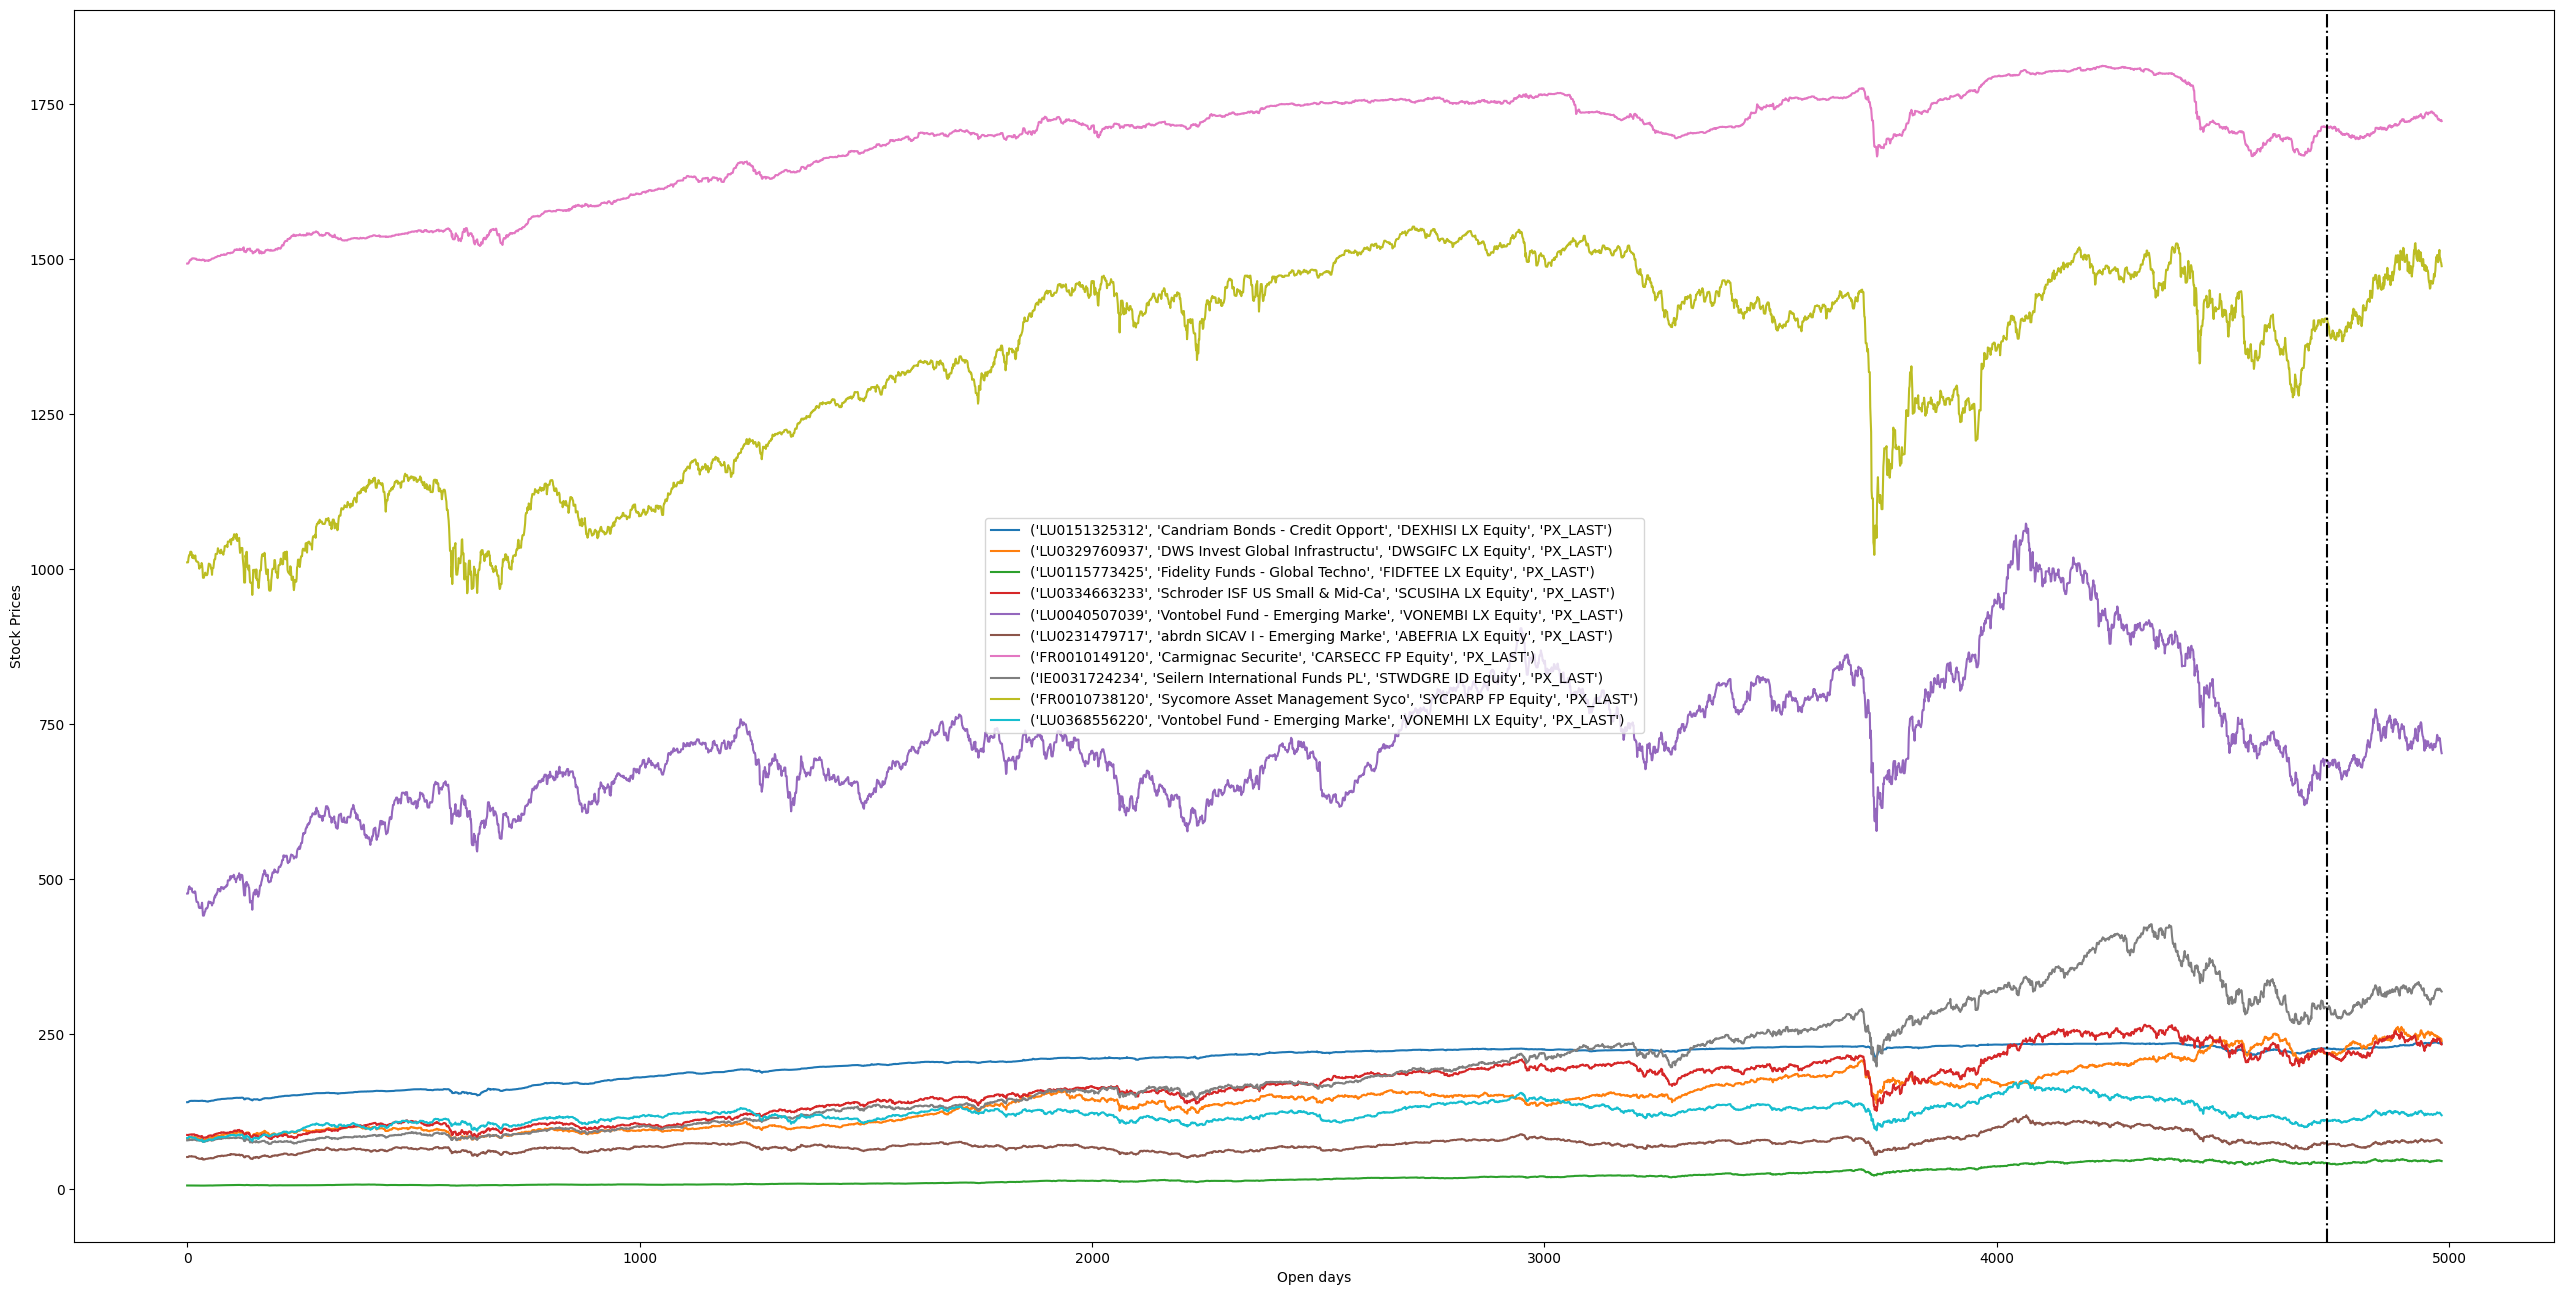

In [34]:
import numpy as np
import matplotlib.pyplot as plt

n = stocks_history.df.to_numpy().shape[0]  # Number of days in the history.
m = future_prices.shape[1]  # Number of predicted days

# legend
stocks_names = stocks_history.df.columns
k = len(stocks_names)  # Number of stocks

prices = np.vstack(
    (stocks_history.prices.T, future_prices[:, 1:].T)
)  # shape (n + m, k)

fig, ax = plt.subplots(figsize=(32, 16))
ax.plot(prices[:, :10], label=stocks_names[:10])
ax.axvline(x=n, ymin=0, ymax=1, c="black", linestyle="-.")
ax.set_xlabel("Open days")
ax.set_ylabel("Stock Prices")
ax.legend();

## Verify the quality of the results

To be sure that all is as expected we verify that:

1. The covariance of the daily returns of our simulated prices are the same as the historical one.  
   We call ``sar`` the simulated anual returns and ``dar`` the desired anual returns and made an assertion to verify that they are very close to each other.

In [25]:
sar = future_prices.T[-1, :] / future_prices.T[0, :] - 1
dar = np.array(list(ear.values()))  # desired anual returns
assert np.allclose(sar, dar)

2. The anual returns of the each simulated stock are the same as the given ones.  
   For that we can write a simple function call ``get_daily_returns()`` to compute the daily returns given an array of prices.

In [26]:
import numpy.typing as npt

def get_daily_returns(array: npt.NDArray) -> npt.NDArray:
    # array: shape (n, k)
    # output: shape (n-1, k)
    return np.diff(array, axis=1) / array[:, :-1]

Finally we verify that the obtained covariance is identical to the one compute with the simulated prices.

1. Compute the daily return.  
2. Compute the covariance ``future_cov`` and ``history_cov``.   
3. Verify that they are very close to each other.   

In [27]:
future_returns = get_daily_returns(future_prices)
future_cov = np.cov(future_returns)

history_returns = get_daily_returns(stocks_history.prices)
history_cov = np.cov(history_returns)

assert np.allclose(history_cov, future_cov)

All work as expected!

In [28]:
import pandas as pd

simulated_prices = pd.DataFrame(future_prices.T, columns=ear).to_json()  # A sting...